In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [4]:
max_features = 10000
maxlen = 500
batch_size = 32
epochs = 5

history_dict = {}

In [5]:
(xt, yt), (xts, yts) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [6]:
xt = sequence.pad_sequences(xt, maxlen=maxlen)
xts = sequence.pad_sequences(xts, maxlen=maxlen)

In [7]:
xlstm = Sequential()
xlstm.add(Embedding(max_features, 32))
xlstm.add(LSTM(32))
xlstm.add(Dense(1, activation='sigmoid'))

xlstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("LSTM Training")
hist_lstm = xlstm.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_data=(xts, yts))
history_dict['LSTM'] = hist_lstm.history

LSTM Training
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.6818 - loss: 0.5772 - val_accuracy: 0.7038 - val_loss: 0.5994
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7894 - loss: 0.4795 - val_accuracy: 0.8330 - val_loss: 0.3833
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8919 - loss: 0.2787 - val_accuracy: 0.8742 - val_loss: 0.3080
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.9230 - loss: 0.2036 - val_accuracy: 0.8718 - val_loss: 0.3178
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.9404 - loss: 0.1639 - val_accuracy: 0.8621 - val_loss: 0.3278


In [9]:
xGRU = Sequential()
xGRU.add(Embedding(max_features, 32))
xGRU.add(GRU(32))
xGRU.add(Dense(1, activation='sigmoid'))

xGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("GRU Training")
hist_gru = xGRU.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_data=(xts, yts))
history_dict['GRU'] = hist_gru.history

GRU Training
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 98ms/step - accuracy: 0.6906 - loss: 0.5434 - val_accuracy: 0.8572 - val_loss: 0.3415
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9010 - loss: 0.2541 - val_accuracy: 0.8738 - val_loss: 0.3041
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9351 - loss: 0.1768 - val_accuracy: 0.8731 - val_loss: 0.3134
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9587 - loss: 0.1183 - val_accuracy: 0.8288 - val_loss: 0.4647
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.9687 - loss: 0.0946 - val_accuracy: 0.8739 - val_loss: 0.3942


In [10]:
xlosstm, xaccstm = xlstm.evaluate(xts, yts)
xlogru, xacgru = xGRU.evaluate(xts, yts)

print("LSTM Test loss:", xlosstm)
print("LSTM Test Accuracy:", xaccstm)
print("GRU Test loss:", xlogru)
print("GRU Test Accuracy:", xacgru)

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8733 - loss: 0.3590
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8740 - loss: 0.3971
LSTM Test loss: 0.35516682267189026
LSTM Test Accuracy: 0.8731600046157837
GRU Test loss: 0.3942430913448334
GRU Test Accuracy: 0.8738800287246704


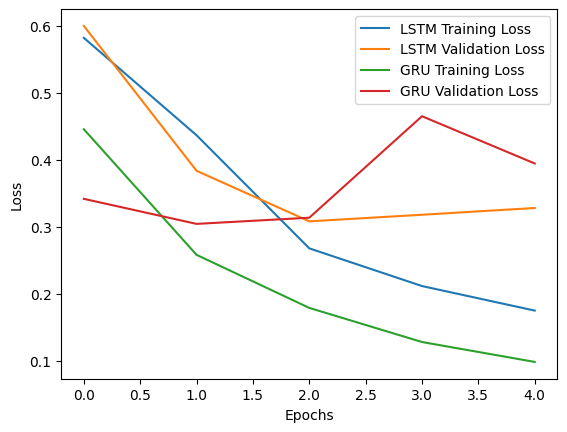

: 

In [11]:
plt.plot(history_dict['LSTM']['loss'], label='LSTM Training Loss')
plt.plot(history_dict['LSTM']['val_loss'], label='LSTM Validation Loss')
plt.plot(history_dict['GRU']['loss'], label='GRU Training Loss')
plt.plot(history_dict['GRU']['val_loss'], label='GRU Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()